# The Power of Compound Interest

This notebook will explore how compound interest grows investments over time. Use the cells below to run simulations, visualize growth, and compare different contribution strategies.
- In this experiment, we will see two investors: one that invests $10,000 at once and leaves the money to grow, and one that starts with $1,000, but continually invests $100 a month.
- Each investor will be have their money invested only into the S&P 500 for 50 years, resembling scenarios for young investors
- Their results will be graphed and interpreted at the end, and we will see who ends up making more money.


## The Big Question

What happens when steady contributions in the S&P 500 meet compound interest over decades?

## Research

The S&P 500 is a stock market index that tracks the 500 largest publicly traded US companies. It's often used as a benchmark for the overall performance of the US stock market. In short, it's how the economy is doing in terms of major businesses. Historically, since 1928, the S&P 500 has returned about 10-11% per year on average before inflation and about 7% per year on average after inflation. In 2024, last year's annual return was +24.2%, including dividends. In this experiment, we use the S&P 500 because it's the easiest way to show compound interest.

## Hypothesis

If an investor invested a large sum at one time and let compound interest do the rest, then that investor would make more over 50 years than an investor who starts with a smaller amount but consistently invests a small sum each month.

## Formulas

For the one-time investor, we will use the basic compound interest formula:

- FV = P(1+r)t

And for the consistent investor, we'll use a bit more advanced of a formula:

- FV = P * (1 + r)**n + PMT * (((1 + r)**n - 1) / r)

Here's what everything stands for:
- FV - Future value - the total amount after compounding
- P - Principle - the initial amount you start with
- r - rate - Interest rate per period
- n - time - total amount of compounding periods
- PMT - Regular payment added each period(only for second formula)

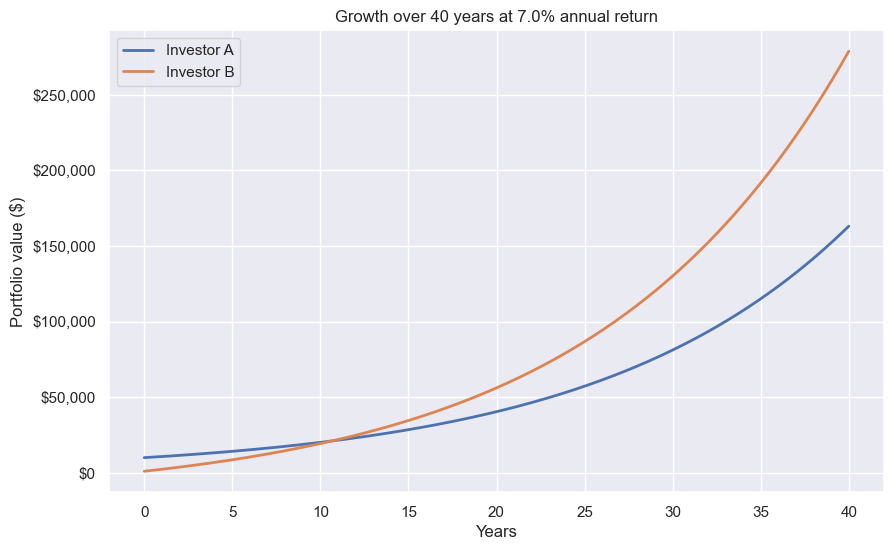

After 40 years:
 - One-time $10,000 => $163,114.11
 - Start $1,000 + $100/mo => $278,792.75


,year,one_time,monthly_contrib
0,0,10000.000000,1000.000000
1,1,10722.900809,2311.548610
2,2,11498.060175,3717.909175
3,3,12329.255875,5225.935659
4,4,13220.538779,6842.977499


In [11]:
# Simulation and plot: one-time vs monthly contributions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure inline plotting in notebook frontends (optional)
try:
    get_ipython()
    try:
        get_ipython().run_line_magic('matplotlib', 'inline')
    except Exception:
        pass
except NameError:
    pass

# Robust plotting style setup: prefer seaborn (sns.set()), otherwise fallback safely
try:
    import seaborn as sns
    sns.set()
except Exception as seaborn_err:
    try:
        # Some matplotlib installs include named seaborn-like styles
        plt.style.use('seaborn-v0_8')
    except Exception as style_err:
        print('Could not apply seaborn style; falling back to default.\n',
              'seaborn import error:', seaborn_err, '\nstyle error:', style_err)
        print('Available matplotlib styles:', plt.style.available)
        plt.style.use('default')
    else:
        print('Seaborn not importable, but applied style "seaborn-v0_8"')


def fv_one_time(P, r, t):
    """Future value of a one-time principal P after t periods at rate r per period."""
    return P * (1 + r) ** t


def fv_with_contributions(P, PMT, r, t):
    """Future value with end-of-period contributions (PMT) each period."""
    if np.isclose(r, 0.0):
        return P + PMT * t
    return P * (1 + r) ** t + PMT * (((1 + r) ** t - 1) / r)

# Parameters (you can tweak these)
annual_rate = 0.07       # 7% annual return
years = 40               # investment horizon
periods_per_year = 12    # monthly contributions/compounding
r = annual_rate / periods_per_year
n = years * periods_per_year
periods = np.arange(0, n + 1)

# Investor A: one-time $10,000
P_A = 10_000
PMT_A = 0
values_A = fv_one_time(P_A, r, periods)

# Investor B: start $1,000, contribute $100 per month
P_B = 1000
PMT_B = 100
values_B = fv_with_contributions(P_B, PMT_B, r, periods)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(periods / periods_per_year, values_A, label='Investor A', lw=2)
ax.plot(periods / periods_per_year, values_B, label='Investor B', lw=2)
ax.set_xlabel('Years')
ax.set_ylabel('Portfolio value ($)')
ax.set_title(f'Growth over {years} years at {annual_rate*100:.1f}% annual return')
ax.legend()
ax.grid(True)

# Format y-axis with dollar commas
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

# Print final values
print(f'After {years} years:')
print(f' - One-time $10,000 => ${values_A[-1]:,.2f}')
print(f' - Start $1,000 + $100/mo => ${values_B[-1]:,.2f}')

# Return a small dataframe with yearly snapshots (every 12 periods)
yearly = pd.DataFrame({
    'year': np.arange(0, years + 1),
    'one_time': values_A[::periods_per_year],
    'monthly_contrib': values_B[::periods_per_year]
})

yearly.head()

## Analysis & Conclusion

After running the simulation, we  see how each investment strategy performed over the 40-year period.

- Investor A totaled out with approvimately $160,000
- Investor B totaled out with almost $300,000

You'd think that just relying on compound interest would make you a millionaire by the title. But we see that consistently adding more contributions outperforms plain compound interest. This experiment shows that, while compound interest is a powerful factor with investing, it isn't everything. It will only get you so far. Regular contributions are necessary to really build wealth over time. Combine that with other investments like gold or real estate and smart investing, I can almost guarantee you will be a millionaire one day. Thank you for reading!